<a href="https://colab.research.google.com/github/ori112/Boston-housing/blob/main/wine_quality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [134]:
#reading project file
df = pd.read_csv(r'/content/winequality-red.csv')

In [135]:
#inspecting the df
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [148]:
#inspecting the df
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [136]:
#inspecting the features and target types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [137]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [138]:
#inspecting unique values for target label
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

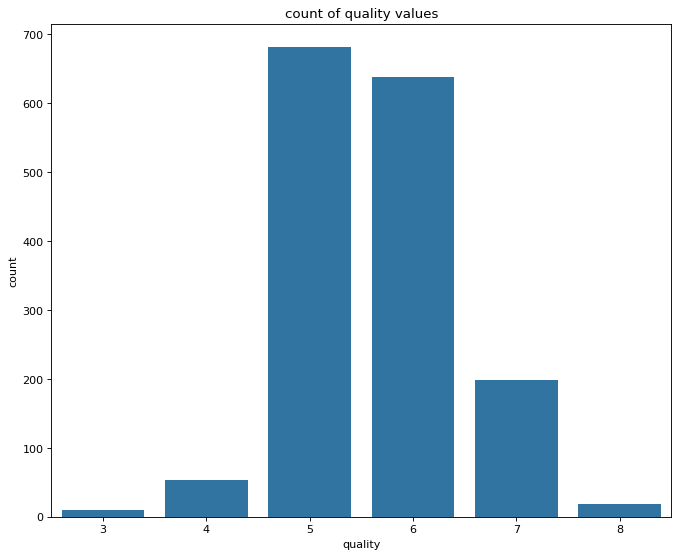

In [147]:
#inspecting counts for unique values for target label
plt.figure(figsize=(10, 8), dpi=80)
plt.title("count of quality values")
sns.countplot(data = df, x='quality')
plt.show()

In [91]:
#preprocessing the quality label to two groups "bad" and "good"
labels = ["bad", "good"]

for index, row in df.iterrows():
    if row["quality"] <= 5:
        df.at[index, "quality"] = labels[0]
    else:
        df.at[index, "quality"] = labels[1]


quality
good    855
bad     744
Name: count, dtype: int64

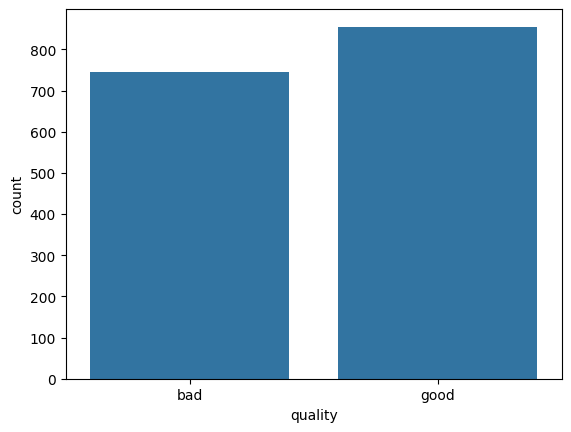

In [93]:
#visualizing the two groups
sns.countplot(data = df, x='quality')
df["quality"].value_counts()

In [94]:
#label encoding
label_enocder = LabelEncoder()
df['quality'] = label_enocder.fit_transform(df['quality'])

quality
1    855
0    744
Name: count, dtype: int64

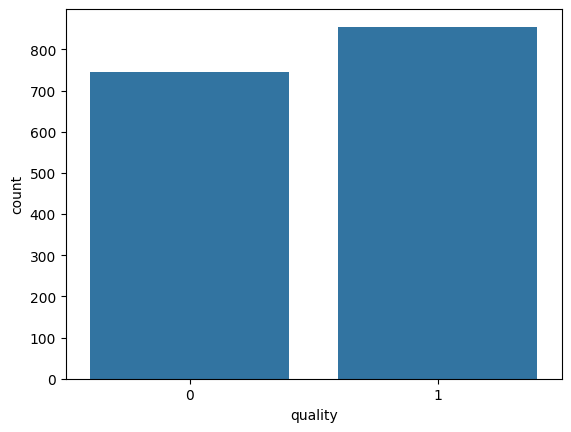

In [95]:
#re-checking labels
sns.countplot(data = df, x='quality')
df["quality"].value_counts()

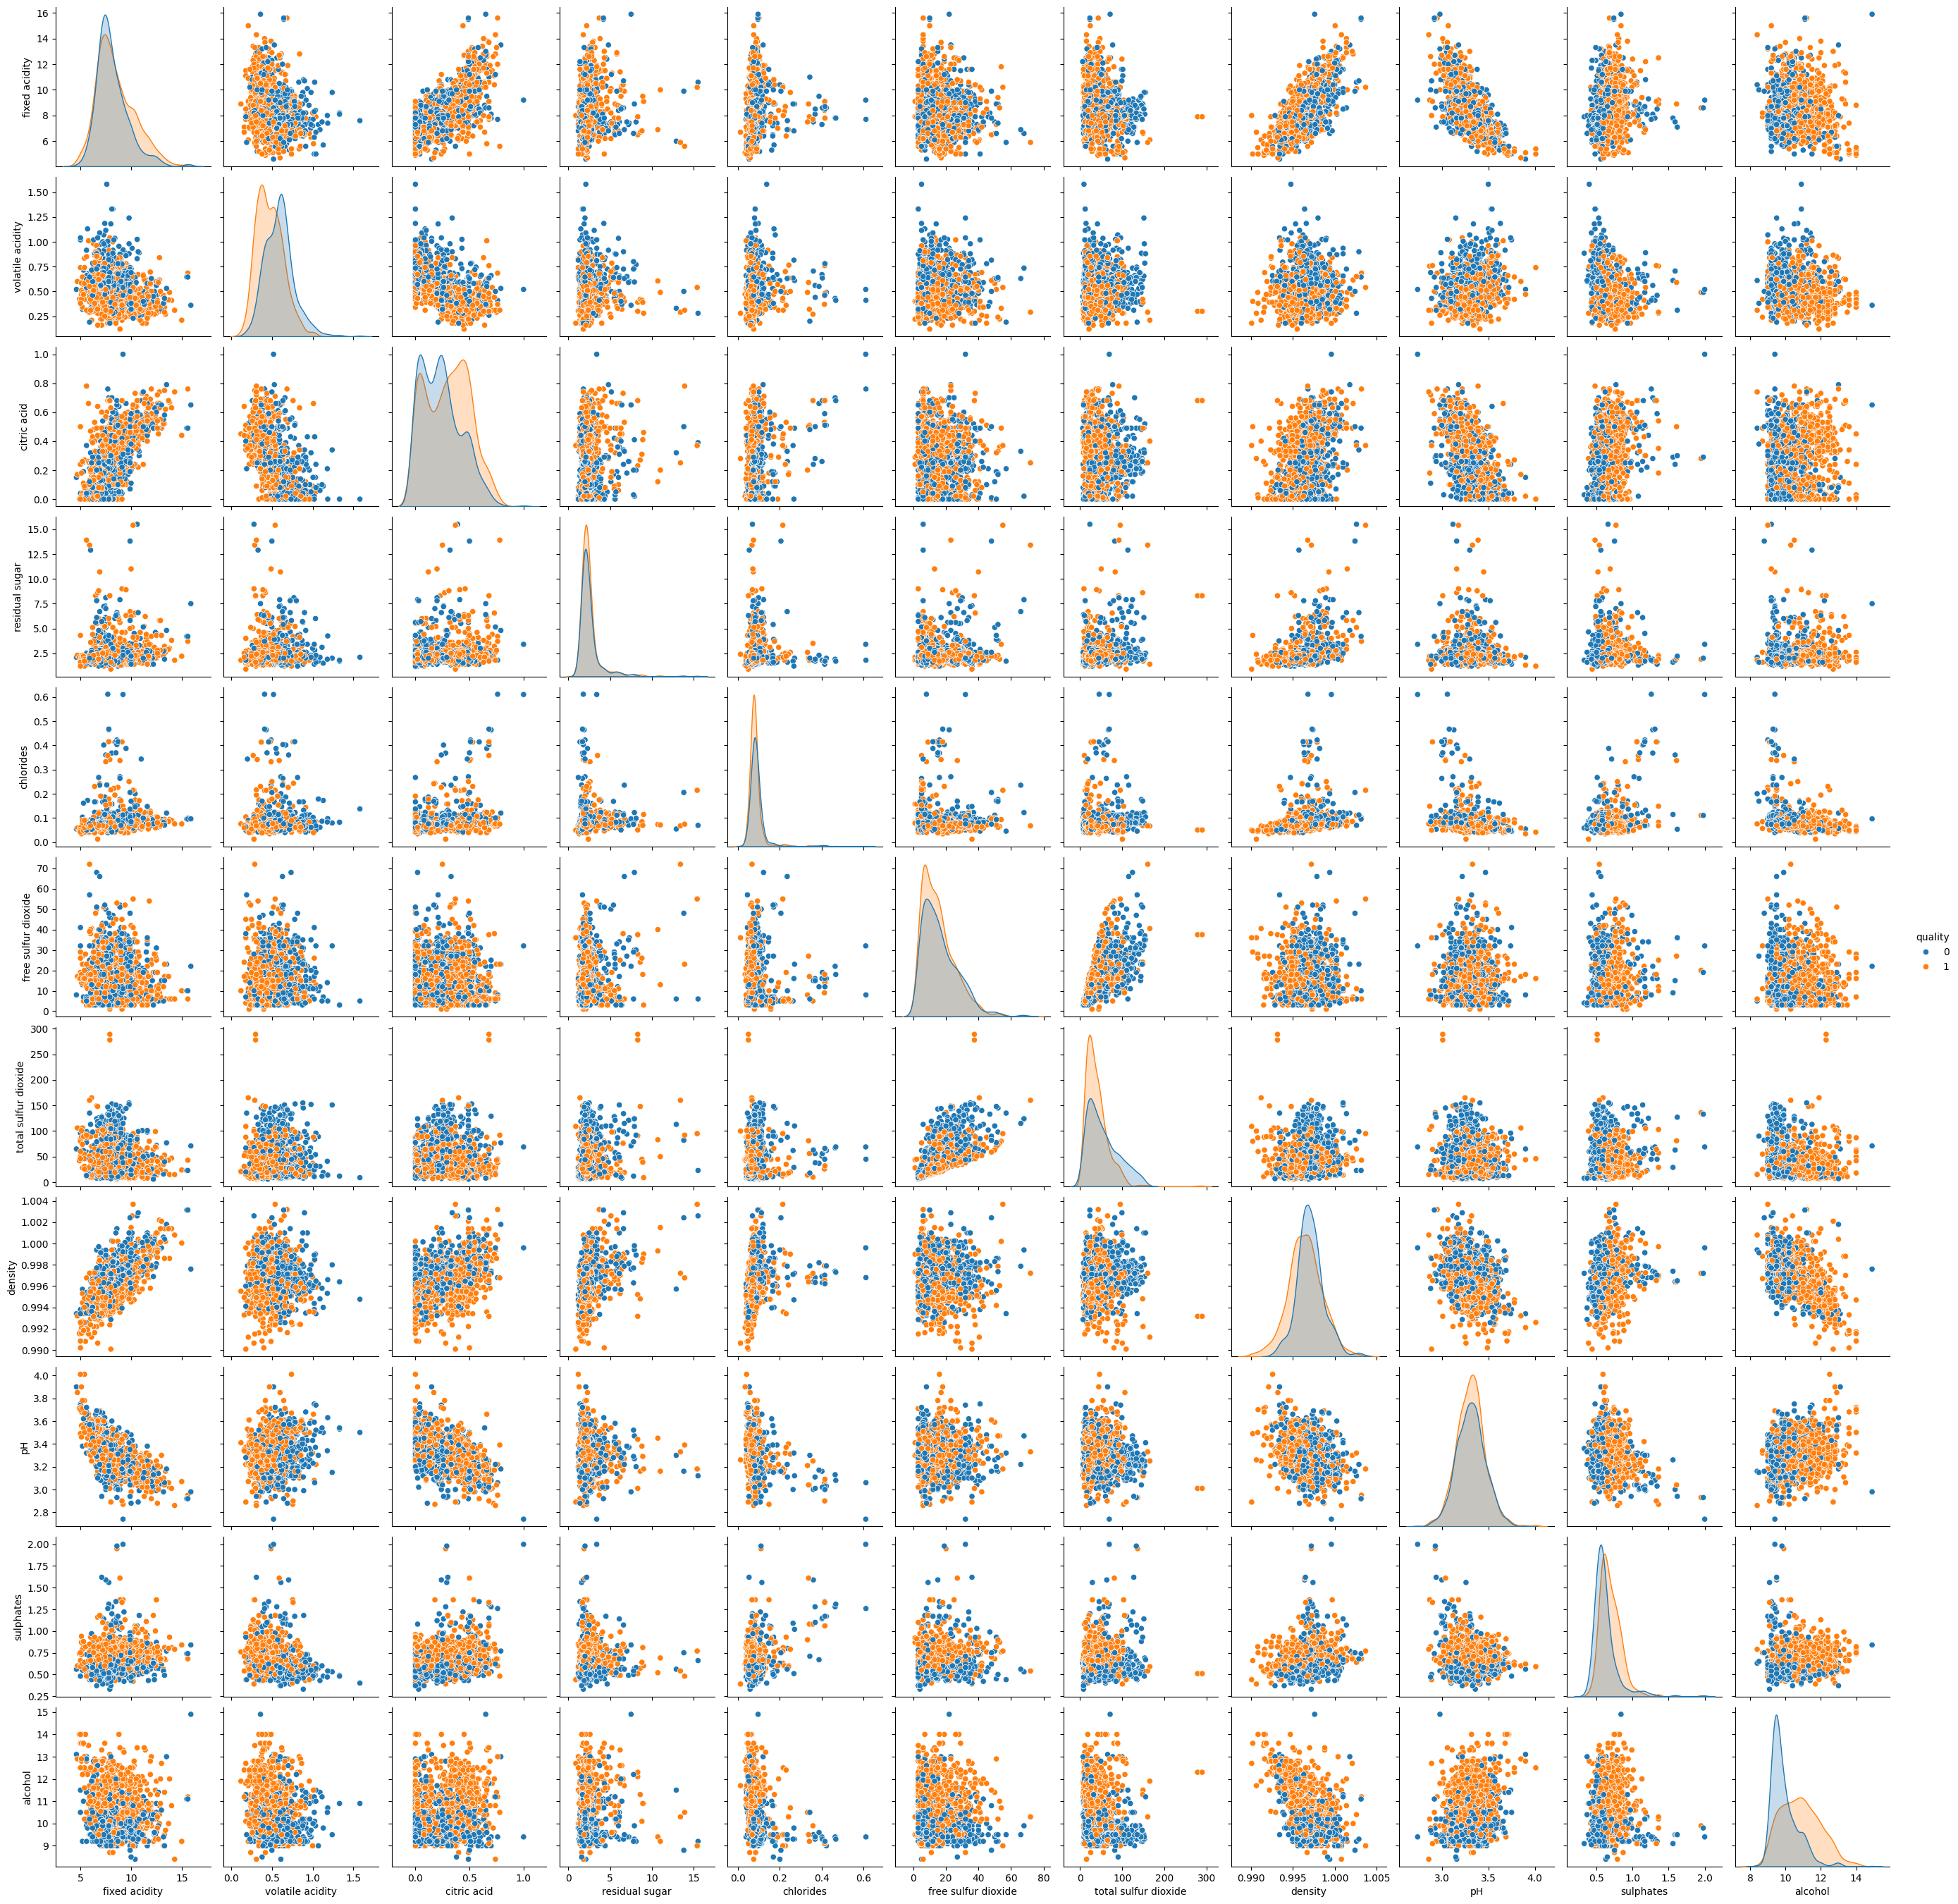

In [96]:
#checking relationships between variables
sns.pairplot(df, hue="quality")

In [97]:
#creating feature and tartget variables
X = df.drop('quality', axis = 1)
y = df['quality']

In [98]:
#splitting data for trainning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
#applying standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# random forest classifier

In [100]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [101]:
#creating predictions
pred_rfc = rfc.predict(X_test)

In [102]:
#printing classification reports
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       141
           1       0.81      0.76      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [103]:
#printing confusion matrix
print(confusion_matrix(y_test,pred_rfc))

[[110  31]
 [ 43 136]]


In [104]:
#calculation "good" probabilities
y_score = rfc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

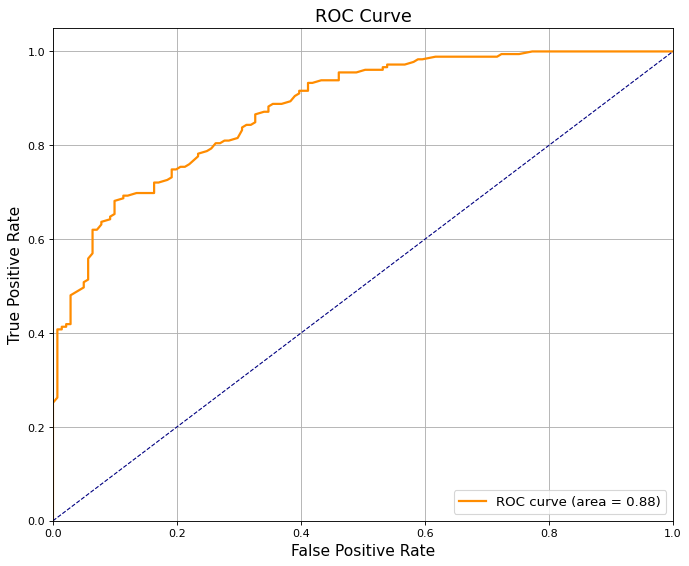

In [105]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# SVM classifier


In [106]:
#intializing svm classifier
svm = svm.SVC(probability=True)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [107]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       141
           1       0.81      0.76      0.78       179

    accuracy                           0.77       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.77      0.77       320



In [108]:
print(confusion_matrix(y_test,pred_svm))

[[109  32]
 [ 43 136]]


In [109]:
#calculation "good" probabilities
y_score = svm.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

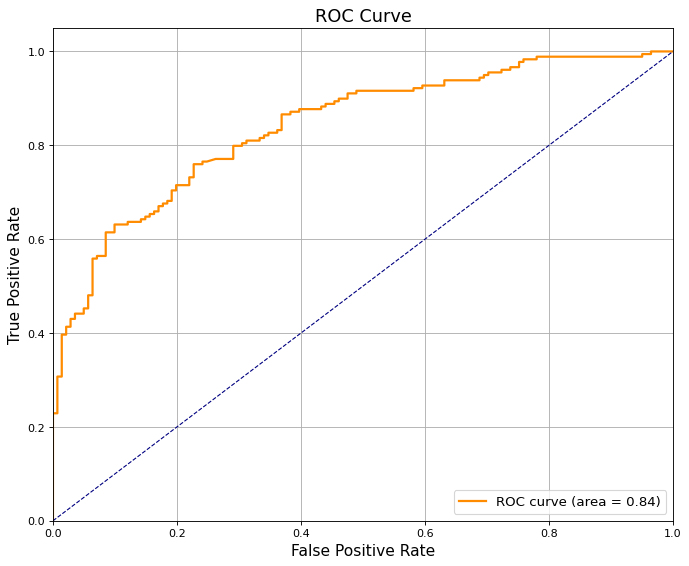

In [110]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# neural network

In [111]:
mlpc = MLPClassifier(hidden_layer_sizes=(20,20,20),max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [112]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       141
           1       0.75      0.72      0.74       179

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



In [113]:
print(confusion_matrix(y_test, pred_mlpc))

[[ 98  43]
 [ 50 129]]


In [114]:
#calculation "good" probabilities
y_score = mlpc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

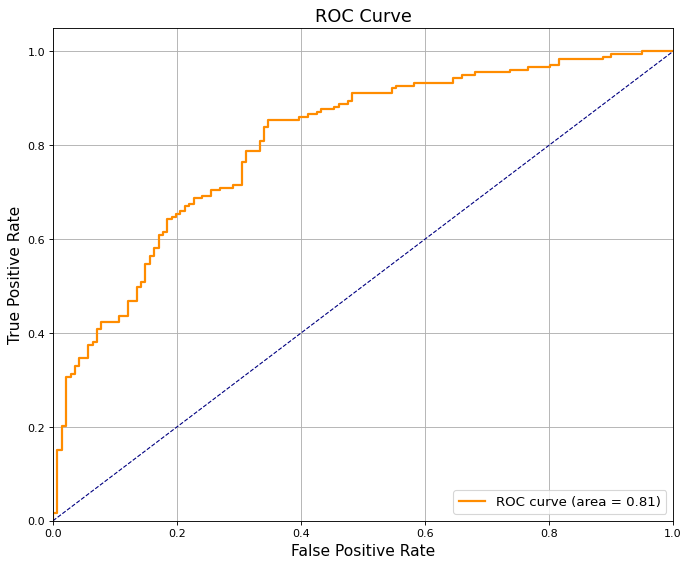

In [115]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# KNN

In [116]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [117]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       141
           1       0.76      0.74      0.75       179

    accuracy                           0.73       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.73      0.72      0.73       320



In [118]:
print(confusion_matrix(y_test,pred_knn))

[[100  41]
 [ 47 132]]


In [119]:
#calculation "good" probabilities
y_score = knn.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

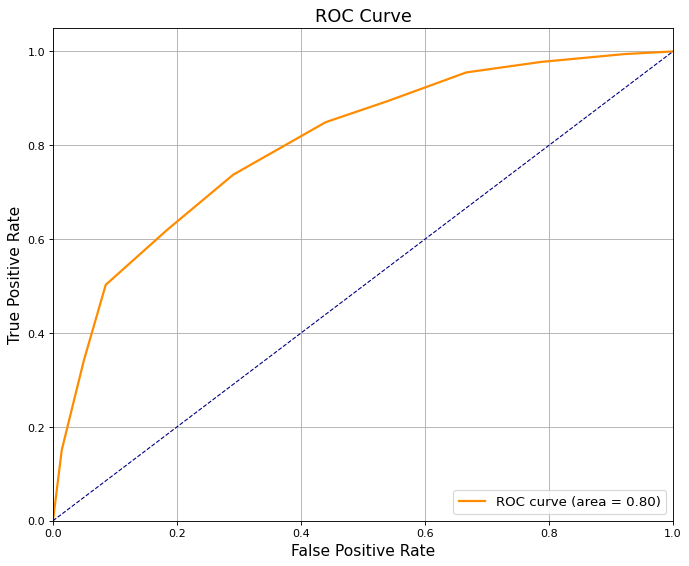

In [120]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Decision Tree

In [121]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train ,y_train)
pred_dtc = dtc.predict(X_test)

In [122]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       141
           1       0.75      0.68      0.72       179

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.70      0.70       320



In [123]:
print(confusion_matrix(y_test,pred_dtc))

[[101  40]
 [ 57 122]]


In [124]:
#calculation "good" probabilities
y_score = dtc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

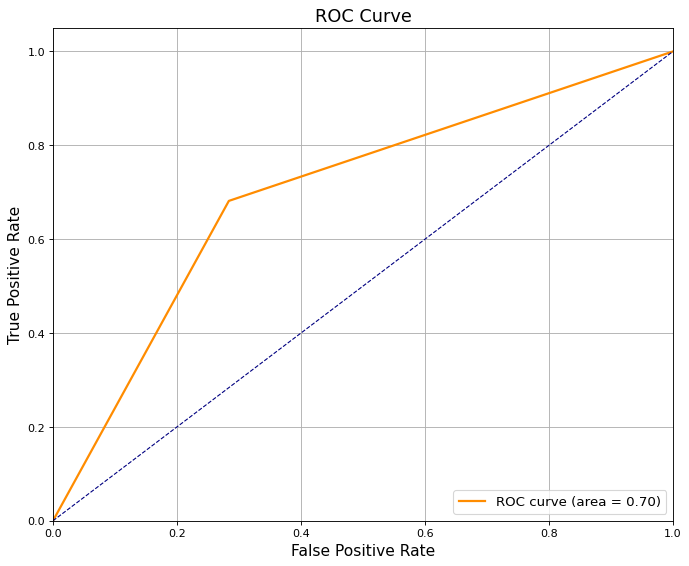

In [125]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

#Logistic Regression

In [126]:
#initializing and training model
lr = lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [127]:
#inspecting classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       141
           1       0.80      0.72      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [128]:
#inspecting confusion_matrix report
print(confusion_matrix(y_test,pred_lr))

[[108  33]
 [ 51 128]]


In [129]:
#calculation "good" probabilities
y_score = lr.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

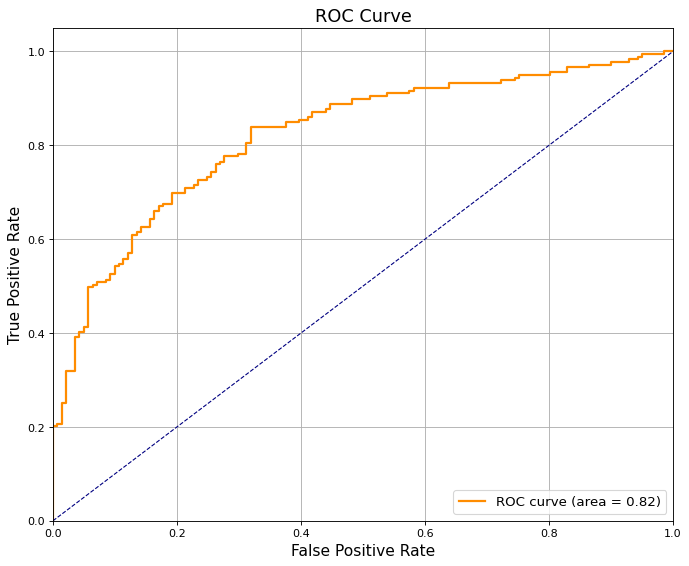

In [130]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Comparing ROC curves

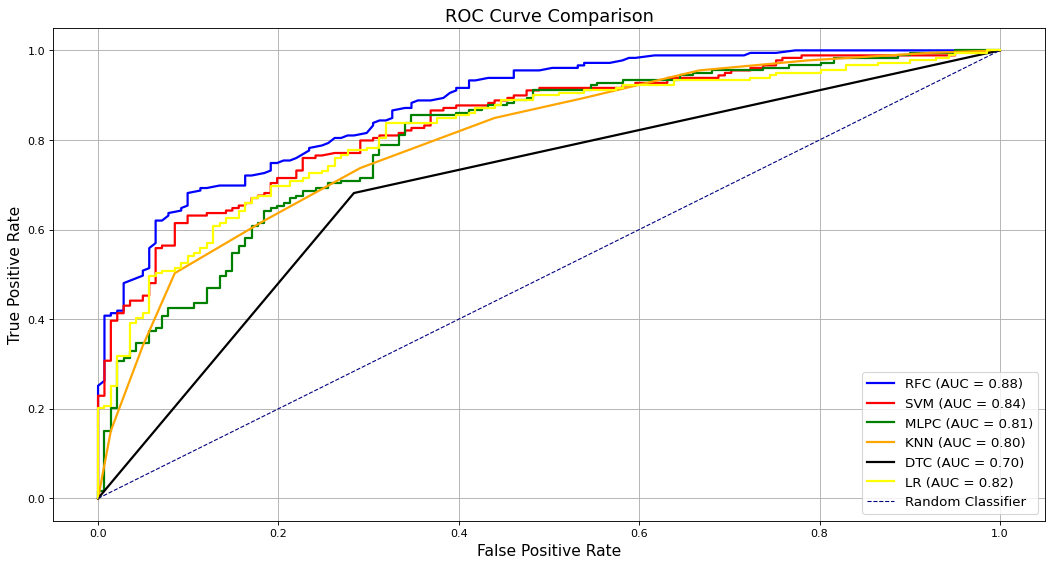

In [131]:
# Compute ROC curve and ROC area for each model

y_score_rfc = rfc.predict_proba(X_test)[:, 1]
y_score_svm = svm.predict_proba(X_test)[:, 1]
y_score_mlpc = mlpc.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_dtc = dtc.predict_proba(X_test)[:, 1]
y_score_lr = lr.predict_proba(X_test)[:, 1]

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_mlpc, tpr_mlpc, _ = roc_curve(y_test, y_score_mlpc)
roc_auc_mlpc = auc(fpr_mlpc, tpr_mlpc)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_score_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves for each model
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label='RFC (AUC = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_mlpc, tpr_mlpc, color='green', lw=2, label='MLPC (AUC = %0.2f)' % roc_auc_mlpc)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, color='black', lw=2, label='DTC (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_lr, tpr_lr, color='yellow', lw=2, label='LR (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')

# Add labels and legend
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

# Show plot
plt.show()